In [6]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff("../hypothyroid_modified_cjlin.arff")
data = pd.DataFrame(data[0])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',8.80,2.7,108.0,1.11,97.0,b'other',b'compensated_hypothyroid'
3394,68.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.00,2.1,124.0,1.08,114.0,b'SVI',b'negative'
3395,74.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',5.10,1.8,112.0,1.07,105.0,b'other',b'negative'
3396,72.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.70,2.0,82.0,0.94,87.0,b'SVI',b'negative'


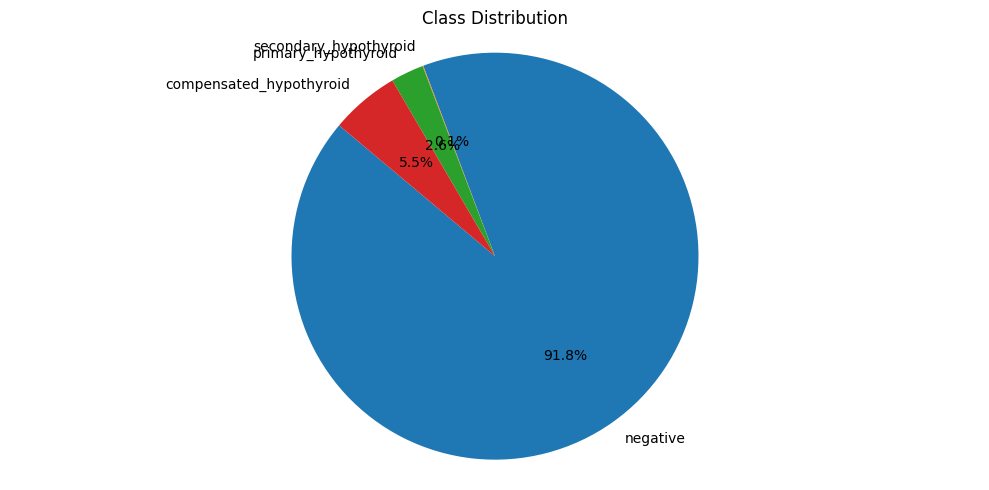

In [7]:
import matplotlib.pyplot as plt
ansType = {cls: 0 for cls in set(data["Class"])}
total = 0
for cls in data["Class"]:
    ansType[cls] += 1
    total += 1
    
# 將字串百分比轉成數值以便畫圖
labels = [key.decode() if isinstance(key, bytes) else str(key) for key in ansType.keys()]
values = [float(val) for val in ansType.values()]

# 畫出圓餅圖
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data)

x = data.iloc[:,0:-4]
y = data.iloc[:,-4:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# 將 one-hot 轉回類別標籤以便 sklearn 相容
y_train_cls = np.argmax(y_train, axis=1)
y_test_cls = np.argmax(y_test, axis=1)

data

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,23.0,4.10,2.0,102.0,1.00,106.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,46.0,0.98,1.7,109.0,0.91,120.0,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
3,70.0,0.16,1.9,175.0,1.00,106.0,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,70.0,0.72,1.2,61.0,0.87,70.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3394,68.0,1.00,2.1,124.0,1.08,114.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3395,74.0,5.10,1.8,112.0,1.07,105.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3396,72.0,0.70,2.0,82.0,0.94,87.0,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_bar_metrics(acc_list, f1_list, loss_list, model_name="Model"):
    runs = np.arange(1, len(acc_list) + 1)

    # 畫圖
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.bar(runs, acc_list, color='skyblue')
    plt.title(f"{model_name} - Accuracy per Run")
    plt.xlabel("Run")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)

    plt.subplot(1, 3, 2)
    plt.bar(runs, loss_list, color='salmon')
    plt.title(f"{model_name} - Log Loss per Run")
    plt.xlabel("Run")
    plt.ylabel("Loss")

    plt.subplot(1, 3, 3)
    plt.bar(runs, f1_list, color='lightgreen')
    plt.title(f"{model_name} - F1 Score per Run")
    plt.xlabel("Run")
    plt.ylabel("F1 Macro")
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

    # 整理成表格
    df = pd.DataFrame({
        "Run": runs,
        "Accuracy": np.round(acc_list, 4),
        "Log Loss": np.round(loss_list, 4),
        "F1 Macro": np.round(f1_list, 4)
    })

    print(f"\n {model_name} - Detailed Results:")
    print(df.to_string(index=False))

    # 清除避免污染
    acc_list.clear()
    f1_list.clear()
    loss_list.clear()


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, log_loss
import numpy as np
import pandas as pd

acc_list, f1_list, loss_list = [], [], []
results_grid = []

param_grid = {
    'clf__solver': ['lsqr', 'eigen'],
    'clf__shrinkage': ['auto', 0.1, 0.5],
}

all_labels = list(np.unique(np.concatenate([y_train_cls, y_test_cls])))

for run in range(10):
    print(f"Run {run+1}")

    pipe = Pipeline([
        ('clf', LinearDiscriminantAnalysis())
    ])

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train_cls)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)

    acc = accuracy_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred, average='macro')
    loss = log_loss(y_test_cls, y_prob, labels=all_labels)

    acc_list.append(acc)
    f1_list.append(f1)
    loss_list.append(loss)

    for i, params in enumerate(grid.cv_results_['params']):
        solver = params['clf__solver']
        shrinkage = params['clf__shrinkage']

        clf = LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage)
        clf.fit(x_train, y_train_cls)
        y_pred_i = clf.predict(x_test)
        y_prob_i = clf.predict_proba(x_test)

        acc_i = accuracy_score(y_test_cls, y_pred_i)
        f1_i = f1_score(y_test_cls, y_pred_i, average='macro')
        loss_i = log_loss(y_test_cls, y_prob_i, labels=all_labels)

        results_grid.append({
            'solver': solver,
            'shrinkage': shrinkage,
            'acc': acc_i,
            'loss': loss_i,
            'f1': f1_i
        })

Run 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 2


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 3


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 4


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 5


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 6


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 7


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 8


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 9


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

Run 10


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_cova

In [11]:
# 顯示結果表格
df_results = pd.DataFrame(results_grid)
print("\n=== 所有參數組合結果（依 acc 排序） ===")
print(df_results.sort_values(by='acc', ascending=False).reset_index(drop=True))



=== 所有參數組合結果（依 acc 排序） ===
   solver shrinkage   acc      loss        f1
0    lsqr      auto  0.95  0.212852  0.447177
1   eigen      auto  0.95  0.212852  0.447177
2    lsqr       0.1  0.95  0.214287  0.431002
3   eigen       0.1  0.95  0.214287  0.431002
4    lsqr       0.5  0.95  0.235305  0.431748
5   eigen       0.5  0.95  0.235305  0.431748
6    lsqr      auto  0.95  0.212852  0.447177
7   eigen      auto  0.95  0.212852  0.447177
8    lsqr       0.1  0.95  0.214287  0.431002
9   eigen       0.1  0.95  0.214287  0.431002
10   lsqr       0.5  0.95  0.235305  0.431748
11  eigen       0.5  0.95  0.235305  0.431748
12   lsqr      auto  0.95  0.212852  0.447177
13  eigen      auto  0.95  0.212852  0.447177
14   lsqr       0.1  0.95  0.214287  0.431002
15  eigen       0.1  0.95  0.214287  0.431002
16   lsqr       0.5  0.95  0.235305  0.431748
17  eigen       0.5  0.95  0.235305  0.431748
18   lsqr      auto  0.95  0.212852  0.447177
19  eigen      auto  0.95  0.212852  0.447177
20   l

In [12]:
print("\n最佳 Accuracy 組合：")
print(df_results.sort_values(by='acc', ascending=False).iloc[0].to_frame().T)

print("\n最低 Loss 組合：")
print(df_results.sort_values(by='loss', ascending=True).iloc[0].to_frame().T)

print("\n最佳 F1 組合：")
print(df_results.sort_values(by='f1', ascending=False).iloc[0].to_frame().T)


最佳 Accuracy 組合：
  solver shrinkage   acc      loss        f1
0   lsqr      auto  0.95  0.212852  0.447177

最低 Loss 組合：
  solver shrinkage   acc      loss        f1
0   lsqr      auto  0.95  0.212852  0.447177

最佳 F1 組合：
  solver shrinkage   acc      loss        f1
0   lsqr      auto  0.95  0.212852  0.447177


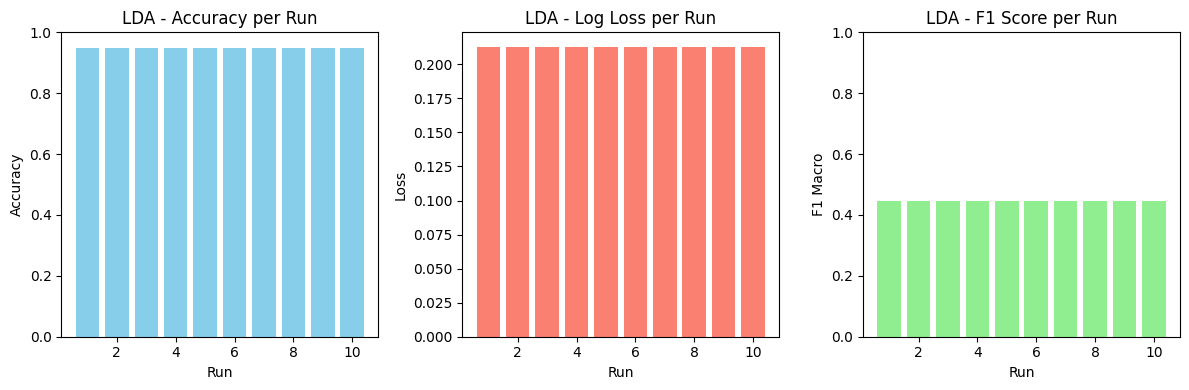


 LDA - Detailed Results:
 Run  Accuracy  Log Loss  F1 Macro
   1      0.95    0.2129    0.4472
   2      0.95    0.2129    0.4472
   3      0.95    0.2129    0.4472
   4      0.95    0.2129    0.4472
   5      0.95    0.2129    0.4472
   6      0.95    0.2129    0.4472
   7      0.95    0.2129    0.4472
   8      0.95    0.2129    0.4472
   9      0.95    0.2129    0.4472
  10      0.95    0.2129    0.4472


In [13]:
plot_bar_metrics(acc_list, f1_list, loss_list, model_name="LDA")